In [69]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import torch

from transformations.transform import WaveformToInput as TorchTransform
from architecture.backend.yamnet.params import YAMNetParams
from architecture.backend.yamnet.model import yamnet
from architecture.backend.yamnet.model import yamnet_category_metadata

from architecture.classifier.classification import Classifier
from datasets.SvdExDataset import SvdExtendedVoiceDataset
from torch.utils.data import DataLoader
from tqdm import tqdm
import IPython

from datasets.SvdExDataset import SvdCutOffShort
from IPython.lib.display import Audio
import IPython.display as ipd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:

dataset = SvdExtendedVoiceDataset(r"/Users/yiftachedelstain/Development/VoiceDisorderIdentification/data/SVD - Extended/",classification_binary=True)
# loader = DataLoader(
#     dataset,
#     batch_size=128,
#     shuffle=False,
#     num_workers=2
# )

# for idx,item in enumerate(tqdm(dataset)):
#     # print(item)
#     break
sr=50000
IPython.display.Audio(dataset[2]['data'],rate=50000,autoplay=True)
# patches, spectrogram = TorchTransform().wavform_to_log_mel(dataset[2]['data'], 44100)
# patches.shape

noise shape torch.Size([8586])


In [62]:
def sf_load_from_int16(fname):
    x, sr = sf.read(fname, dtype='int16', always_2d=False)
    x = x / 2 ** 15
    x = x.T.astype(np.float32)
    return x, sr


waveforms, sr = sf_load_from_int16('2485-i_l.wav')
print(waveforms.shape)
w = waveforms.squeeze()
print(w[0])
w = w[::-1]
print(w[0])
waveforms=w.reshape(1,len(w))
mean = waveforms.mean(axis=1)
variance = waveforms.var(axis=1)
noise = np.random.normal(mean,variance,50000)/20
noise = noise.reshape(1,noise.shape[0])
signal=np.concatenate((waveforms,noise),axis=1)
waveform_for_torch = torch.tensor(signal).float()
print(waveform_for_torch.shape)
patches, spectrogram = TorchTransform().wavform_to_log_mel(waveform_for_torch, 44100)
patches.shape
ipd.Audio(signal,rate=50000,autoplay=True)

(33695,)
0.023223877
-0.0010375977
torch.Size([1, 83695])


(0.0, 100.0)

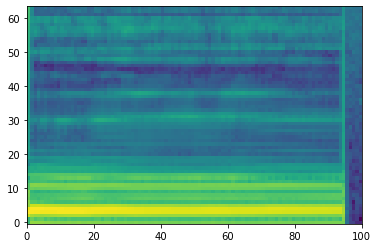

In [85]:
extent = (0, spectrogram.shape[0], -0.5, spectrogram.shape[1] - 0.5)
plt.imshow(spectrogram.T, aspect='auto', interpolation='nearest', origin='lower', extent=extent)
plt.xlim([0, 50000 / sr / YAMNetParams.STFT_HOP_SECONDS])



(0.0, 100.0)

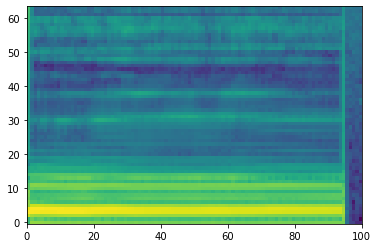

In [93]:
extent = (0, spectrogram.shape[0], -0.5, spectrogram.shape[1] - 0.5)
plt.imshow(spectrogram.T, aspect='auto', interpolation='nearest', origin='lower', extent=extent)
plt.xlim([0, 50000 / sr / YAMNetParams.STFT_HOP_SECONDS])


